In [43]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [44]:
import tensorflow as tf

In [45]:
import pickle
import numpy as np
train_images = pickle.load(open("/kaggle/input/train-dataset/full_CNN_train.p", "rb" ))

labels = pickle.load(open("/kaggle/input/train-dataset/full_CNN_labels.p", "rb" ))

# Make into arrays as the neural network wants these
train_images = np.array(train_images)
labels = np.array(labels)

In [46]:
# Normalize labels 
labels= labels/255

train_images, labels = shuffle(train_images, labels)

X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.128)

# Batch size, epochs and pool size below are all paramaters to fiddle with for optimization
batch_size = 128
epochs = 25
pool_size = (2, 2)
input_shape = X_train.shape[1:]

In [47]:
train_datagen = ImageDataGenerator(channel_shift_range=0.2)
train_datagen.fit(X_train)

In [48]:
model=tf.keras.models.Sequential([
# Normalizes incoming inputs. First layer needs the input shape to work
tf.keras.layers.BatchNormalization(input_shape=input_shape),
tf.keras.layers.Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'),
tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'),
# Pooling 1
tf.keras.layers.MaxPooling2D(pool_size=pool_size),

tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'),
tf.keras.layers.Dropout(0.2),
 # Pooling 2
tf.keras.layers.MaxPooling2D(pool_size=pool_size),

tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv8'),
# Pooling 3
tf.keras.layers.MaxPooling2D(pool_size=pool_size),
# Upsample 1
tf.keras.layers.UpSampling2D(size=pool_size),
#Deconv
tf.keras.layers.Conv2DTranspose(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'),
tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'),
tf.keras.layers.Dropout(0.25),
# Upsample 2
tf.keras.layers.UpSampling2D(size=pool_size),

tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'),
# Upsample 3
tf.keras.layers.UpSampling2D(size=pool_size),

tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv7'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv8'),
tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv9Finalone')
])

In [49]:
# Compiling and training the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

model.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size), 
          steps_per_epoch=len(X_train) // batch_size,  # Use integer division
          epochs=50, verbose=1, validation_data=(X_val, y_val))


Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 300ms/step - accuracy: 0.8675 - loss: 0.0881 - val_accuracy: 0.9367 - val_loss: 0.0340
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9396 - loss: 0.0273 - val_accuracy: 0.9353 - val_loss: 0.0327
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.9444 - loss: 0.0230 - val_accuracy: 0.9517 - val_loss: 0.0163
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9514 - loss: 0.0160 - val_accuracy: 0.9516 - val_loss: 0.0173
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9532 - loss: 0.0139 - val_accuracy: 0.9554 - val_loss: 0.0115
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9562 - loss: 0.0106 - val_accuracy: 0.9552 - val_loss: 0.0118
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.9555 - loss: 0.0109 - val_accuracy: 0.9567 - val_loss: 0.0092
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9560 - loss: 0.0099 - val_accuracy: 0.9567 -

In [55]:
model.trainable = False
model.save('lanemodel1.h5')

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 80, 160, 3)     │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 78, 158, 8)     │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 76, 156, 16)    │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 38, 78, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 36, 76, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 36, 76, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 34, 74, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 34, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (None, 32, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv6 (Conv2D)                  │ (None, 14, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 14, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv7 (Conv2D)                  │ (None, 12, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 12, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv8 (Conv2D)                  │ (None, 10, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 15, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 10, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Deconv1 (Conv2DTranspose)       │ (None, 12, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Deconv2 (Conv2DTranspose)       │ (None, 14, 34, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Deconv3 (Conv2DTranspose)       │ (None, 16, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 32, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,015,757 (3.87 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 338,589 (1.29 MB)

 Optimizer params: 677,168 (2.58 MB)

In [52]:
pip install moviepy

Note: you may need to restart the kernel to use updated packages.


In [53]:
import numpy as np
import cv2
from moviepy.editor import VideoFileClip
from keras.models import load_model
import matplotlib.pyplot as plt


In [56]:
from keras.models import load_model

# Load your trained model
model = load_model('/kaggle/working/lanemodel1.h5')


In [57]:
import numpy as np
import cv2
from PIL import Image

class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

def road_lines(image, model):
    """ Takes in a road image, resizes for the model,
    predicts the lane to be drawn from the model in G color,
    recreates an RGB image of a lane and merges with the
    original road image.
    """
    image_shape = image.shape
    # Get image ready for feeding into model
    # Using Pillow for resizing
    small_img = Image.fromarray(image)  # Convert the image to a Pillow Image
    small_img = small_img.resize((160, 80))  # Resize to (width, height)
    small_img = np.array(small_img)  # Convert back to NumPy array
    small_img = small_img[None, :, :, :]  # Add batch dimension

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255 
    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)

    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis=0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)

    # For setting different color for the detection (Green in G channel)
    lane_drawn = np.dstack((lanes.avg_fit, lanes.avg_fit, blanks))

    # Resize lane drawing to match the original image size
    lane_image = cv2.resize(lane_drawn, (image_shape[1], image_shape[0]), interpolation=cv2.INTER_LINEAR)

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)

    return result

lanes = Lanes()


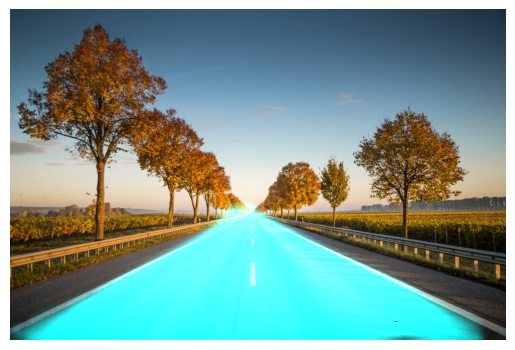

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
Image saved as output_image.jpg
(667, 1000, 3)


In [69]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Show the result image using matplotlib (no need for OpenCV's imshow)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')  # Turn off axis labels
plt.show()


class Lanes:
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

def road_lines(image, model, lanes):
    """
    Takes in a road image, resizes for the model, predicts the lane to be drawn 
    from the model, recreates an RGB image of a lane, and merges with the original road image.
    """
    image_shape = image.shape

    # Get image ready for feeding into model
    small_img = cv2.resize(image, (160, 80))  # Resize to (160, 80) based on your model input size
    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]  # Add batch dimension

    # Make prediction with the neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)

    # Only use the last five for averaging
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]
    
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis=0)

    # Generate fake R & B color dimensions, stack with G (Green for lane)
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)

    # Set different color for the detection (Green for lanes)
    lane_drawn = np.dstack((lanes.avg_fit, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = cv2.resize(lane_drawn, (image_shape[1], image_shape[0]), interpolation=cv2.INTER_LINEAR)

    # Ensure both images have the same type before using addWeighted
    image = image.astype(np.uint8)
    lane_image = lane_image.astype(np.uint8)

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)

    return result

# Load your trained model
model = load_model('/kaggle/working/lanemodel.h5')  # Replace with your model's actual path

# Load image
image_path = '/kaggle/input/image1/0_b5ptHu0y7wUeMddy.jpg'  # Replace with your image file path
image = cv2.imread(image_path)

# Create lanes object
lanes = Lanes()

# Call the road_lines function for lane detection on the image
result_image = road_lines(image, model, lanes)



cv2.imwrite('output_image.jpg', result_image)  # Save output image
print("Image saved as output_image.jpg")
print(result_image.shape)  # Check the shape of the result image
